In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import preprocessing

data = pd.read_csv('EEG-Eye-State.csv', sep=',')
data

,AF3,F7,F3,FC5,T7,P7,01,02,P8,T8,FC6,F4,F8,AF4,EyeDetect
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
5,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0
6,4319.49,4001.03,4280.51,4151.79,4343.59,4584.62,4089.74,4615.90,4212.31,4226.67,4201.03,4269.74,4625.13,4378.46,0
7,4325.64,4006.67,4278.46,4143.08,4344.10,4583.08,4087.18,4614.87,4205.64,4230.26,4195.90,4266.67,4622.05,4380.51,0
8,4326.15,4010.77,4276.41,4139.49,4345.13,4584.10,4091.28,4608.21,4187.69,4229.74,4202.05,4273.85,4627.18,4389.74,0
9,4326.15,4011.28,4276.92,4142.05,4344.10,4582.56,4092.82,4608.72,4194.36,4228.72,4212.82,4277.95,4637.44,4393.33,0


In [38]:
y = data.iloc[:, -1:]
y

,EyeDetect
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [39]:
x = data.iloc[:, :-1]
x

,AF3,F7,F3,FC5,T7,P7,01,02,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
5,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74
6,4319.49,4001.03,4280.51,4151.79,4343.59,4584.62,4089.74,4615.90,4212.31,4226.67,4201.03,4269.74,4625.13,4378.46
7,4325.64,4006.67,4278.46,4143.08,4344.10,4583.08,4087.18,4614.87,4205.64,4230.26,4195.90,4266.67,4622.05,4380.51
8,4326.15,4010.77,4276.41,4139.49,4345.13,4584.10,4091.28,4608.21,4187.69,4229.74,4202.05,4273.85,4627.18,4389.74
9,4326.15,4011.28,4276.92,4142.05,4344.10,4582.56,4092.82,4608.72,4194.36,4228.72,4212.82,4277.95,4637.44,4393.33


In [40]:
import math
all_rows = 14980 

train_data = int(math.floor(all_rows * 0.8))
test_data = int(math.floor(all_rows * 0.2))
target_data = int(math.floor(all_rows * 0))

x_train = x[:train_data]
x_test = x[train_data:(train_data + test_data)]

y_train = y.iloc[:train_data]
y_test = y.iloc[train_data:(train_data + test_data)]

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)


('alpha: ', 0.09)
  score: 0.49
  Variance score: 0.49
('alpha: ', 0.06)
  score: 0.51
  Variance score: 0.51
('alpha: ', 0.01)
  score: 0.48
  Variance score: 0.48
('alpha: ', 0.009)
  score: 0.46
  Variance score: 0.46
('alpha: ', 0.006)
  score: 0.45
  Variance score: 0.45
('alpha: ', 0.001)
  score: 0.45
  Variance score: 0.45
('alpha: ', 0.0009)
  score: 0.44
  Variance score: 0.44
('alpha: ', 0.0006)
  score: 0.45
  Variance score: 0.45
('alpha: ', 0.0001)
  score: 0.45
  Variance score: 0.45
('alpha: ', 9e-05)
  score: 0.45
  Variance score: 0.45
('alpha: ', 6e-05)
  score: 0.44
  Variance score: 0.44
('alpha: ', 1e-05)
  score: 0.45
  Variance score: 0.45
('alpha: ', 9e-06)
  score: 0.44
  Variance score: 0.44
('alpha: ', 6e-06)
  score: 0.42
  Variance score: 0.42
('alpha: ', 1e-06)
  score: 0.44
  Variance score: 0.44
('alpha: ', 9e-07)
  score: 0.45
  Variance score: 0.45
('alpha: ', 6e-07)
  score: 0.42
  Variance score: 0.42
('alpha: ', 1e-07)
  score: 0.38
  Variance scor

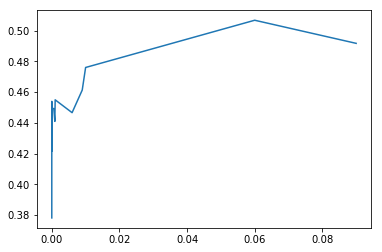

In [41]:
alphas = [0.09, 0.06, 0.01, 0.009, 0.006, 0.001, 0.0009, 0.0006, 0.0001, 0.00009, 0.00006, 0.00001, 0.000009, 0.000006, 0.000001, 0.0000009, 0.0000006, 0.0000001]
varScr = np.empty(18)

# average = micro --- Calculate metrics globally by counting the total true positives, false negatives and false positives.
# alpha : --- L2 penalty (regularization term) parameter.
# solver --- adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# max_iter --- Maximum number of iterations.
# learning_rate_init --- The initial learning rate used.
#It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

for i in range(len(alphas)):
    clas = MLPClassifier(alpha=alphas[i], max_iter=1500, learning_rate_init = 0.003, shuffle=False)
    
    clas.fit(x_train, y_train)
    y_pred = clas.predict(x_test)

    varScr[i] = f1_score(y_test, y_pred, average='micro')
    
    print("alpha: " , alphas[i])
    print("  score: %.2f" % clas.score(x_test, y_test))
    print('  Variance score: %.2f' % f1_score(y_test, y_pred, average='micro'))  

fig = plt.figure()
plt.plot(alphas,varScr)
plt.show()

('alpha: ', 0.09)
Variance score: 0.43
score: 0.43
('alpha: ', 0.06)
Variance score: 0.43
score: 0.43
('alpha: ', 0.01)
Variance score: 0.43
score: 0.43
('alpha: ', 0.009)
Variance score: 0.43
score: 0.43
('alpha: ', 0.006)
Variance score: 0.43
score: 0.43
('alpha: ', 0.001)
Variance score: 0.43
score: 0.43
('alpha: ', 0.0009)
Variance score: 0.43
score: 0.43
('alpha: ', 0.0006)
Variance score: 0.43
score: 0.43
('alpha: ', 0.0001)
Variance score: 0.43
score: 0.43
('alpha: ', 9e-05)
Variance score: 0.43
score: 0.43
('alpha: ', 6e-05)
Variance score: 0.43
score: 0.43
('alpha: ', 1e-05)
Variance score: 0.43
score: 0.43
('alpha: ', 9e-06)
Variance score: 0.43
score: 0.43
('alpha: ', 6e-06)
Variance score: 0.43
score: 0.43
('alpha: ', 1e-06)
Variance score: 0.43
score: 0.43
('alpha: ', 9e-07)
Variance score: 0.43
score: 0.43
('alpha: ', 6e-07)
Variance score: 0.43
score: 0.43
('alpha: ', 1e-07)
Variance score: 0.43
score: 0.43


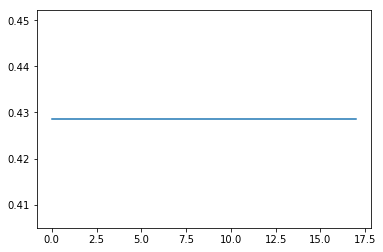

In [28]:
for i in range(len(alphas)):
    pers = Perceptron(alpha=alphas[i])

    pers.fit(x_train, y_train)
    y_pred = pers.predict(x_test)
    
    varScr[i] = f1_score(y_test, y_pred, average='micro')
    
    print("alpha: " , alphas[i])
    print('Variance score: %.2f' % f1_score(y_test, y_pred, average='micro')) 
    print("score: %.2f" % pers.score(x_test, y_test))
fig = plt.figure()
plt.plot(varScr)
plt.show()